<a href="https://colab.research.google.com/github/iciromaco/RadiShLab/blob/master/S3_iGrabIt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# iGrabIt 

プログラム名 iGrabit.py

OpenCV のGrabCutという関数を用いて画像の前景領域を抽出するためのツールです。

<div align="center">
<img src="https://user-images.githubusercontent.com/24559785/75554908-28a5ae00-5a33-11ea-9b1e-ce737aa6d440.gif" width=512 align='center'> </img>
</div>

(参考) [GrabCutを使った対話的前景領域抽出](http://labs.eecs.tottori-u.ac.jp/sd/Member/oyamada/OpenCV/html/py_tutorials/py_imgproc/py_grabcut/py_grabcut.html)


このプログラムはGUIの実現に kivy を用いました。kivyは Google Colaboratory と互換性がないようで、実行すると勝手に画面解像度が変わってしまい、うまくできません。またローカルで実行する場合も、 jupyter notebook 上で実行すると不具合がでるようです。

jupyter notebook 上の起動でも、!起動であれは大丈夫です。

## プログラムの起動手順

Anaconda Terminal 上で、次のコマンドを実行
```
python -m iGrabit
```

仮想環境RLを作っている場合は、コマンドを打ち込む前に、

1. Anaconda Navigator を起動
2. Environments 
3. RL 仮想環境から terminal を起動

という手順が必要です。

<img width="323" alt="75362944-54992600-58b1-11ea-8f18-49bfb7838167" src="https://user-images.githubusercontent.com/24559785/75363685-5fa08600-58b2-11ea-9a7d-b3fc8bce2600.png" >

最近の Windows版 Anaconda であれば、Startメニューに上の図のように、仮想環境のターミナルを起動するメニューができているはずなので、それを起動するのが簡単です。


# 使用方法
## File メニュー

特に説明は不要だと思います。

- 開く
- 保存
- 終了

の３つは想像通りの働きをします。

Quit メニューを使わなくても、ウィンドウの閉じるボタンで終了させても構いません。

まだバグがあるかもしれません。もしもウィンドウがフリーズしてしまったら、terminal の方で、Control+C を使って強制終了させてください。


- スクリーンショット
- 描線の太さ変更

はおまけの機能です。

スクリーンショットはデスクトップ全体を取り込んで処理対象とします。一部を切り取ったりする機能はありません。

描線の太さとは、輪郭線の太さを指します。メニューを選ぶたびに１ピクセルと２ピクセルとの間でトグルします。

切り替えてもすぐには変更が反映しません。次に描画する時から変更後の太さに変わります。太さが変わってもシルエットが変わるわけではありません。


## 切り出しの手順
1. 切り出し枠の指定
> 切り出したいオブジェクトを囲むように対角の２点を指定してください。座標はマウスボタンのリリース時に確定となる方式です。
2. GrabCut のリトライ
> 指定した枠で画像が切り取られると同時に GrabCut が実行されます。Cutボタンを押すと輪郭線が微妙に変化します。何度か押してみて、きれいに切り出せたらところでやめてください。
3. ヒント情報を与えた上でカット
> 結果に満足がいかない場合は、ヒント情報を与えてください。  
> 0 ボタンを押し、確実に背景である画素を指定   
> 1 ボタンを押し、確実に前景である画素を指定

Cutを試みるたびに境界線の位置が変化するのは、GrabCutが漸近的最適化アルゴリズムだからです。一定の収束条件のもとに計算を打ち切って結果としています。輪郭が鮮明で曖昧性がなければすぐに収束するので繰り返しを追加しても変化は起こりませんが、そうでない場合は変化していき、場合によっては振動します。
[(参考)](http://visitlab.jp/pdf/GrabCut.pdf)

In [1]:
import rdlib4 as rd
import matplotlib.pyplot as plt
icons = rd.loadPkl('res/picdic.pkl')
def showicon(name):
    plt.figure(dpi=16)
    rd.plotimg(icons[name])

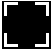

In [2]:
showicon('frame')

# 枠指定モード

![枠指定](https://user-images.githubusercontent.com/24559785/75603541-3efd4980-5ac7-11ea-94a9-7a511bb49688.png)

画像を読み込むと自動的に枠指定モードとなります。切り出したい対象物を囲む矩形の対角の２点を順に指定してください。  
マウスを離したタイミングで位置を確定します。

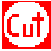

In [3]:
showicon('cut')

# GrabCut の実行

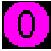

In [4]:
showicon('zero')

# 背景指定モード

このボタンを押してから、確実に背景画素である箇所をマウスで塗ってください。塗りつぶす必要はありません。

![背景指定](https://user-images.githubusercontent.com/24559785/75604050-b71a3e00-5acc-11ea-82a8-4b12d2b4331d.png)

画像を読み込むと自動的に枠指定モードとなります。切り出したい対象物を囲む矩形の対角の２点を順に指定してください。
マウスを離したタイミングで位置を確定します。

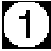

In [5]:
showicon('one')

# 前景指定モード

このボタンを押してから、確実に前景画素である箇所をマウスで塗ってください。塗りつぶす必要はありません。

![前景指定](https://user-images.githubusercontent.com/24559785/75603601-de224100-5ac7-11ea-80ae-ebfafeb4e62e.png)
    
前景の場合も背景の場合も、描画しただけでは結果は変化しません。
    
指定が終わったら Cut のボタンを押してください。
<div align='center'>
↓　Cut
</div>

![前景指定2](https://user-images.githubusercontent.com/24559785/75603669-7c160b80-5ac8-11ea-852d-959d1b0e46e6.png)

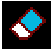

In [6]:
showicon('eraser')

# 戻す

直前の描画や枠指定位置をなかったことにして、元に戻します。


<font size='60' color = "blue"> AC</font>

# オールクリア

すべての操作をリセットして画像読み込み直後に戻します。

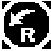

In [7]:
showicon('rot90') 

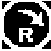

In [8]:
showicon("rot270")

# 90度回転

画像を指定方向に90度回転させます。

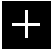

In [9]:
showicon('plus') 

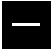

In [10]:
showicon('minus') 

# ペン先の太さの増減


前景・背景指定の際のペン先の太さを増減させることができます。

<br><br>

<font size='60' color = "blue"> RF </font>
# リフォームモードのトグルスイッチ

ON --> GrabCut の出力のうち、最大白領域の輪郭線を平滑化して塗りつぶしたものを結果とします。  
OFF --> GrabCut の素の出力を結果とします。

このボタンを押すと Cut ボタンを押した時と同じGrabCut の計算を１回実行しますので、シルエットが変化します。

# 補足事項

## 入力画像について


```
MAXHIGHT = 640 # 高さがこのサイズを超える画像は強制的にこのサイズ以下になるよう1/2,1/4にリサイズします
```
- 画像の高さが MAXHIGHT を超えている場合、読み込み時に縦の高さが MAXHIGHT となるようにリサイズして表示されます。
- 枠切り出し後は、1:1 表示となります。切り出し後の画像の高さが画面サイズより大きくなるとボタンを押せなくなります。  
現実問題として、解像度が高すぎると非常に計算時間がかかってしまいますので、あらかじめ画像を小さくリサイズしておくべきです。


## 出力画像について
- 保存されるのはシルエットのみです。
- 保存されるシルエットは元の画像上でのシルエットとなります。つまり画像サイズは原画像と同じになります。
- 保存時に、ファイル名、矩形の左上頂点座標と矩形のサイズがターミナル上に次の例のように表示されます。

（例）

```
Write Image /Users/dan/Documents/GitHub/test.png (x:25,y;806),(w:424,h:418))
```

## 多国語対応について


メニューやメッセージは日本語となっていますが、そのリソースはプログラムコードの上の方に次のようにまとめてあります。

```
GRC_RES ={
'OpenImage':'File メニューで画像を開いてください',
'TopLeft':'対象を枠で囲み指定します。左上の点を指定してください',
'BottomRight':'対象を枠で囲み指定します。右下の点を指定してください',
'Confirm':'選択できたらCutボタンを押してください',
'OnCutting':'カット中です。しばらくお待ちください',
'Finished':'満足できるまで何度かCutをクリック or 1234でヒント情報を追加してCut',
'Marking0':'Mark sure BG 確実に背景となる領域をマーク',
'Marking1':'Mark sure FG 確実に対象である領域をマーク',
'ChangeThickness':'輪郭線の線の太さが変更。次の描画の際に反映されます'
}

MENUITEMS = {'Open':"開く",'Save':"保存",'ToggleThickness':"描線の太さ変更",'ScreenShot':"スクリーンショット",'Quit':"終了"}
```

他の言語表示にしたければ、この部分を書き換えてください。